#Fuzzy Logic
Fuzzy Tsukamoto

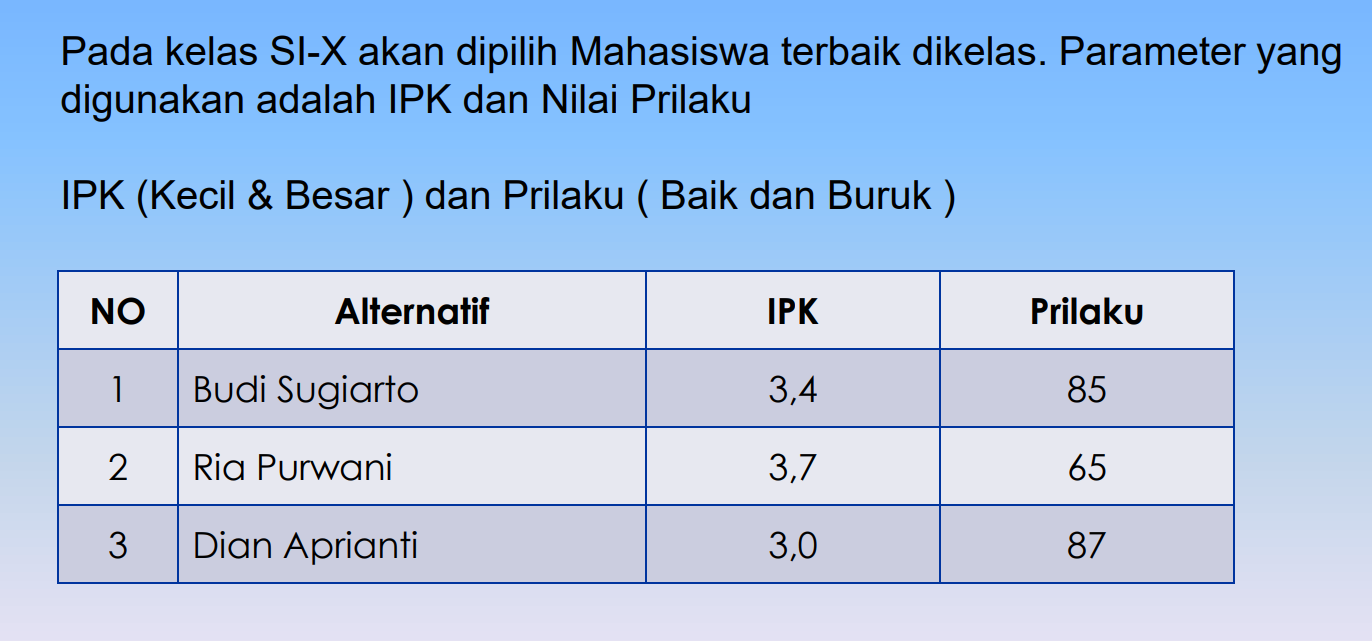

In [17]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
#Library
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [19]:
#Membuat dataframe
df = pd.DataFrame({
    'Nama': ['Budi Sugiarto', 'Ria Purwani', 'Dian Aprianti'],
    'IPK': [3.4, 3.7, 3.0],
    'Perilaku': [85, 65, 87]
})
df

,Nama,IPK,Perilaku
0,Budi Sugiarto,3.4,85
1,Ria Purwani,3.7,65
2,Dian Aprianti,3.0,87


In [28]:
#Membuat variabel input
ipk = ctrl.Antecedent(np.arange(0, 4.5, 0.5), 'ipk')
perilaku = ctrl.Antecedent(np.arange(0, 101, 1), 'perilaku')
keputusan = ctrl.Consequent(np.arange(0, 101, 1), 'keputusan')

In [29]:
# Membuat himpunan fuzzy untuk variabel input
#ipk
ipk['buruk'] = fuzz.trapmf(ipk.universe, [0, 0, 2, 2.5])
ipk['cukup'] = fuzz.trimf(ipk.universe, [2, 3, 3.5])
ipk['baik'] = fuzz.trapmf(ipk.universe, [3, 3.5, 4.5, 4.5])

#perilaku
perilaku['buruk'] = fuzz.trapmf(perilaku.universe, [0, 0, 50, 65])
perilaku['cukup'] = fuzz.trimf(perilaku.universe, [50, 75, 100])
perilaku['baik'] = fuzz.trapmf(perilaku.universe, [65, 75, 100, 100])

#keputusan
keputusan['rendah'] = fuzz.trapmf(keputusan.universe, [0, 0, 50, 65])
keputusan['sedang'] = fuzz.trimf(keputusan.universe, [50, 75, 100])
keputusan['tinggi'] = fuzz.trapmf(keputusan.universe, [65, 75, 100, 100])

In [30]:
#rule
rule1 = ctrl.Rule(ipk['buruk'] | perilaku['buruk'], keputusan['rendah'])
rule2 = ctrl.Rule(ipk['cukup'] & perilaku['cukup'], keputusan['sedang'])
rule3 = ctrl.Rule(ipk['baik'] | perilaku['baik'], keputusan['tinggi'])

#control system
decision_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [31]:
#Kesimpulan
#Control System Simulation
for i, row in df.iterrows():
  sim_ctrl = ctrl.ControlSystemSimulation(decision_ctrl)

  sim_ctrl.input['ipk'] = row['IPK']
  sim_ctrl.input['perilaku'] = row['Perilaku']
  sim_ctrl.compute()

  df.loc[i, 'Keputusan'] = sim_ctrl.output['keputusan']

In [32]:
#result
df

,Nama,IPK,Perilaku,Keputusan
0,Budi Sugiarto,3.4,85,82.741081
1,Ria Purwani,3.7,65,84.861111
2,Dian Aprianti,3.0,87,81.092044
